<a href="https://colab.research.google.com/github/datascience-uniandes/eda-tutorial/blob/master/eda_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) and Visualization tutorial

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
Dataset: FIFA
  
Last update: August, 2022

In [ ]:
!pip install pandas-profiling

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

%matplotlib inline

In [ ]:
# Panadas configuration for extending the number of rows and columns to visualize, if not limit set parameter to None or -1
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [ ]:
# Loading the CSV file as dataframe
fifa_df = pd.read_csv('./data/fifa.csv')

/var/folders/dt/2cpm13y17x3982ph7xkhzc_9q89kth/T/ipykernel_69597/411185781.py:2: DtypeWarning: Columns (22,34) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa_df = pd.read_csv('./data/fifa.csv')


In [ ]:
# Showing dataframe dimensions
fifa_df.shape

(17981, 74)

In [ ]:
# Showing column types
fifa_df.dtypes

Name                    object
Age                      int64
Photo                   object
Nationality             object
Flag                    object
Overall                  int64
Potential                int64
Club                    object
Club Logo               object
Value                   object
Wage                    object
Special                  int64
Acceleration            object
Aggression              object
Agility                 object
Balance                 object
Ball control            object
Composure               object
Crossing                object
Curve                   object
Dribbling               object
Finishing               object
Free kick accuracy      object
GK diving               object
GK handling             object
GK kicking              object
GK positioning          object
GK reflexes             object
Heading accuracy        object
Interceptions           object
Jumping                 object
Long passing            object
Long sho

In [ ]:
# Showing first rows
fifa_df.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Making some basic transformations for columns referring to money: *Value* and *Wage*

In [ ]:
# Analyzing unique values for columns Value and Wage
set(''.join(fifa_df['Value'].values + fifa_df['Wage'].values))

{'.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'K', 'M', '€'}

In [ ]:
# Transforming columns to float based on thousand and million symbols

def money_str_to_float(x):
    x = x.replace('€', '')             # Removing euro symbol
    if 'M' in x:                      # If value has million symbol, remove it and multiply by 1'000.000
        x = x.replace('M', '')
        return float(x) * 1000000
    elif 'K' in x:                    # If value has thousand symbol, remove it and multiply by 1.000
        x = x.replace('K', '')
        return float(x) * 1000
    else:                             # If any symbol is found, only transform the string to float
        return float(x)

fifa_df['Value'] = fifa_df['Value'].apply(money_str_to_float)
fifa_df['Wage'] = fifa_df['Wage'].apply(money_str_to_float)

In [ ]:
fifa_df.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,565000.0,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,565000.0,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,280000.0,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,510000.0,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000.0,230000.0,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analyzing the *Value* column

In [ ]:
# Getting the mean value for all players
fifa_df['Value'].mean()

2385389.5778877703

In [ ]:
# Getting the median value for all players
fifa_df['Value'].median()

675000.0

In [ ]:
# Getting the player with the greatest value
max_value = fifa_df['Value'].max()

fifa_df.loc[fifa_df['Value'] == max_value]

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,280000.0,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0


In [ ]:
# Getting the main statistics for the Value column
fifa_df['Value'].describe()

count    1.798100e+04
mean     2.385390e+06
std      5.353970e+06
min      0.000000e+00
25%      3.000000e+05
50%      6.750000e+05
75%      2.100000e+06
max      1.230000e+08
Name: Value, dtype: float64

<AxesSubplot:>

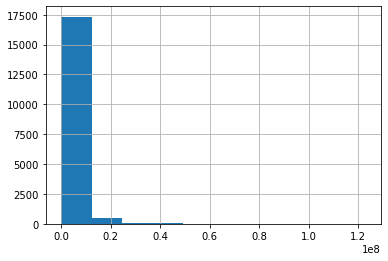

In [ ]:
# Plotting the histogram for the column
fifa_df['Value'].hist()

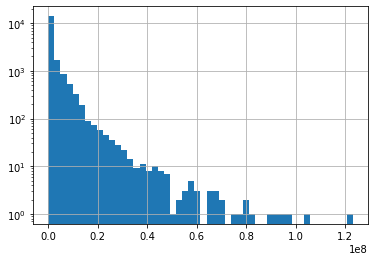

In [ ]:
# Defining the number of bins and the scale for the y-axis for better visualizing
plt.figure()
fifa_df['Value'].hist(bins = 50)
plt.yscale('log')

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff71829b370>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff71829b9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff71829b0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff71829bee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff7182a21f0>],
 'means': []}

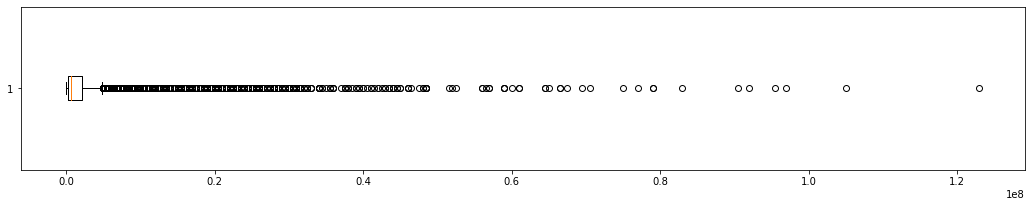

In [ ]:
# Plotting distribution but using a boxplot
plt.figure(figsize = (18, 3))
plt.boxplot(fifa_df['Value'], vert = False)

In [ ]:
# Which are the players with outlier values?
fifa_df[fifa_df['Value'] > (fifa_df['Value'].mean() + fifa_df['Value'].std() * 3)]

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,565000.0,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,565000.0,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,280000.0,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,510000.0,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000.0,230000.0,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,E. Lamela,25,https://cdn.sofifa.org/48/18/players/170368.png,Argentina,https://cdn.sofifa.org/flags/52.png,80,83,Tottenham Hotspur,https://cdn.sofifa.org/24/18/teams/18.png,18500000.0,96000.0,2047,78,74,77,70,82,75,76,83,85,73,79,10,15,11,8,13,71,43,64,72,82,37,75,77,77,82,80,39,74,77,47,59,80,77,80.0,55.0,63.0,79.0,76.0,170368,80.0,61.0,55.0,76.0,63.0,79.0,79.0,76.0,79.0,65.0,LM RM,80.0,61.0,55.0,76.0,63.0,79.0,79.0,76.0,79.0,65.0,76.0
528,M. Dahoud,21,https://cdn.sofifa.org/48/18/players/218339.png,Germany,https://cdn.sofifa.org/flags/21.png,79,87,Borussia Dortmund,https://cdn.sofifa.org/24/18/teams/22.png,18500000.0,52000.0,1979,78,68,87,78,82,59,67,58,81,60,48,14,7,9,12,11,42,67,70,78,78,63,55,65,74,87,72,61,69,85,65,58,81,49,78.0,64.0,73.0,75.0,78.0,218339,78.0,70.0,64.0,78.0,73.0,75.0,76.0,68.0,76.0,73.0,CDM CM,78.0,70.0,64.0,78.0,73.0,75.0,76.0,68.0,76.0,73.0,68.0
534,A. Correa,22,https://cdn.sofifa.org/48/18/players/214997.png,

In [ ]:
# Because the distribution is so skewed, a greatest number of standard deviations is used 
fifa_df[fifa_df['Value'] > (fifa_df['Value'].mean() + fifa_df['Value'].std() * 17)]

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,565000.0,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,565000.0,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,280000.0,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,510000.0,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0


In [ ]:
# Using the method based on quartiles to select outliers
iqr = (fifa_df['Value'].quantile(.75) - fifa_df['Value'].quantile(.25))
fifa_df[fifa_df['Value'] > (fifa_df['Value'].quantile(.75) + iqr * 50)]

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,565000.0,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,565000.0,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,280000.0,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,510000.0,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0


### Analyzing *Preferred Positions* column

In [ ]:
fifa_df['Preferred Positions'].unique()

array(['ST LW ', 'RW ', 'LW ', 'ST ', 'GK ', 'CDM CM ', 'CB ',
       'RM CM CAM ', 'RM LW ST LM ', 'ST CAM ', 'LW RW ST ',
       'CDM CAM CM ', 'RW CAM ', 'RW RM ', 'CM CDM ', 'LM RM CAM ', 'LB ',
       'CM ', 'LM CM CAM ', 'LM CM ', 'LM RM CAM CM ', 'CM CB LB ',
       'LM LB ', 'ST CAM RW CF ', 'CAM LW ', 'LW ST LM ', 'CAM CM ',
       'CDM CB ', 'ST LW CF ', 'CAM CDM CM ', 'LW LM ', 'RM LM ', 'CDM ',
       'LM RW RM ', 'LB RB CB ', 'LW RW ', 'LW LM RM CAM ', 'RM ',
       'LM CF CAM ', 'RB ', 'LM CAM LW ', 'LM RM CM ', 'CAM LM ',
       'CAM RM RW ', 'RM CAM ', 'CAM LW RW ', 'LM ', 'LM CAM ',
       'CAM CF ST ', 'CM CB CDM ', 'RW ST ', 'RW LW CM ', 'CF CAM ',
       'LW CM ', 'RWB RB ', 'CAM ', 'ST CF ', 'LM ST ', 'CM CAM ',
       'CF ST ', 'CB RB ', 'CF CM CAM ', 'LM CAM RW LW ', 'LM RM ',
       'LM RW LW ', 'LM CF RM ', 'CAM LW CM ', 'ST LM ', 'LM ST RM ',
       'RM RW ', 'RM CM ', 'RB CB ', 'CM RW RB ', 'LM RM RW ', 'RW LW ',
       'CM CDM CB ', 'LB CB ', 'ST RM LM ', 'C

<p style="color: red;">How to handle players with multiple Preferred Positions?</p>

<p style="color: red;">Let's take the position with the highest score!</p>

In [ ]:
# How many preferred positions the players have?

def count_pref_positions(x):
    return len(x.strip().split(' '))

fifa_df['Preferred Positions'].apply(count_pref_positions).value_counts(dropna = False, normalize = True)

1    0.541572
2    0.328013
3    0.111284
4    0.019131
Name: Preferred Positions, dtype: float64

In [ ]:
# Select the preferred position with highest score

def get_pref_position(row):
    pref_positions = row['Preferred Positions'].strip().split(' ')
    if len(pref_positions) == 1:
        return pref_positions[0]
    else:
        scores = np.array([row[p] for p in pref_positions])
        i_max = np.argmax(scores)
        return pref_positions[i_max]

fifa_df['Preferred Position'] = fifa_df.apply(get_pref_position, axis = 1)

In [ ]:
# Calculating absolute frecuency for preferred position
pref_positions_abs_frec = fifa_df['Preferred Position'].value_counts(dropna = False)
pref_positions_abs_frec

CB     3306
ST     2456
GK     2029
CM     1559
CDM    1441
LB     1307
CAM    1279
RM     1171
LM     1122
RB     1063
LW      445
RW      440
CF      137
LWB     124
RWB     102
Name: Preferred Position, dtype: int64

<AxesSubplot:>

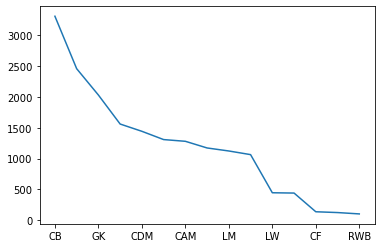

In [ ]:
# Plotting preferred position frecuency
# WARNING: line chart assumes continuity. It is a better choice when dealing with a continuous variable or time
pref_positions_abs_frec.plot()

<AxesSubplot:>

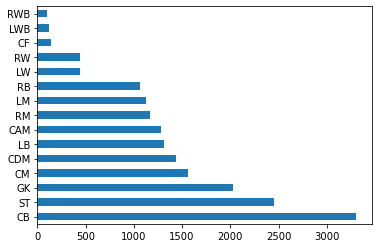

In [ ]:
# Plotting again preferred position frecuency, using a horizontal bar chart this time
pref_positions_abs_frec.plot(kind = 'barh')

In [ ]:
# Calculating absolute frecuency and concatenating results
pref_positions_rel_frec = fifa_df['Preferred Position'].value_counts(dropna = False, normalize = True)
pd.concat([pref_positions_abs_frec, pref_positions_rel_frec], axis = 1)

,Preferred Position,Preferred Position
CB,3306,0.183861
ST,2456,0.136589
GK,2029,0.112841
CM,1559,0.086703
CDM,1441,0.080140
LB,1307,0.072688
CAM,1279,0.071131
RM,1171,0.065124
LM,1122,0.062399
RB,1063,0.059118


### Analyzing *Age* vs. *Value* of the player

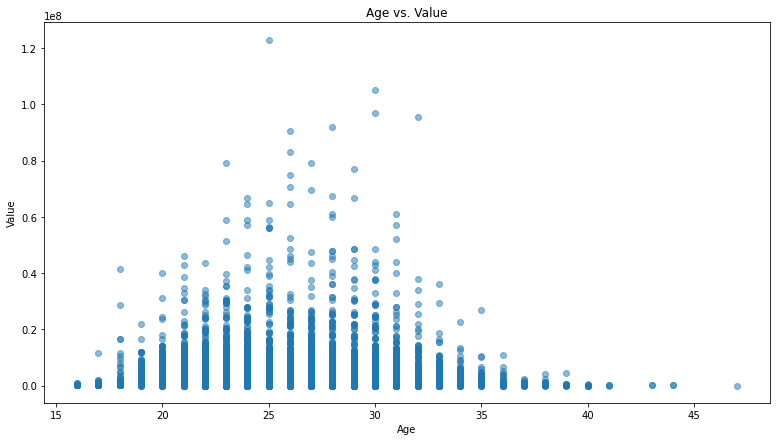

In [ ]:
# Plotting a scatter plot for two quantitative variables
plt.figure(figsize = (13, 7))
plt.scatter(fifa_df['Age'], fifa_df['Value'], alpha = 0.5)
plt.title('Age vs. Value')
plt.xlabel('Age')
plt.ylabel('Value')
plt.show()

In [ ]:
# What is the (linear) correlation coefficient?
fifa_df[['Age', 'Value']].corr()

,Age,Value
Age,1.000000,0.079309
Value,0.079309,1.000000


In [ ]:
# What is the (monotonic) correlation coefficient?
fifa_df[['Age', 'Value']].corr('spearman')

,Age,Value
Age,1.000000,0.227658
Value,0.227658,1.000000


### Análisis bivariado sobre las columnas *Value* y *Overall*

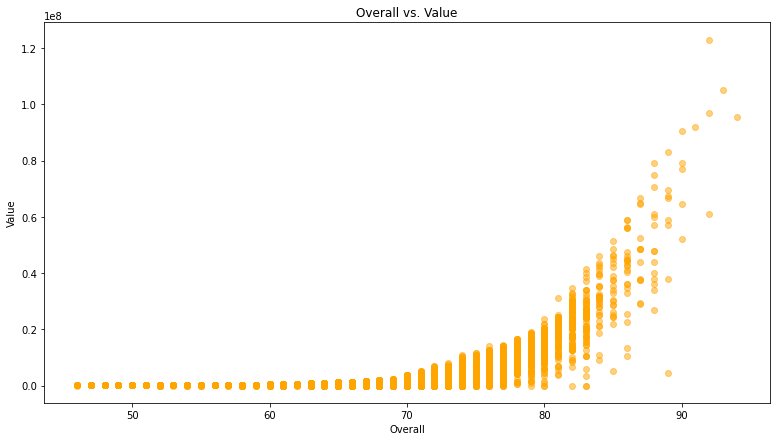

In [ ]:
# Plotting a scatter plot for two quantitative variables
plt.figure(figsize = (13, 7))
plt.scatter(fifa_df['Overall'], fifa_df['Value'], alpha = 0.5, color = 'orange')
plt.title('Overall vs. Value')
plt.xlabel('Overall')
plt.ylabel('Value')
plt.show()

In [ ]:
# What is the (linear) correlation coefficient?
fifa_df[['Overall', 'Value']].corr()

,Overall,Value
Overall,1.000000,0.626001
Value,0.626001,1.000000


In [ ]:
# What is the (monotonic) correlation coefficient?
fifa_df[['Overall', 'Value']].corr('spearman')

,Overall,Value
Overall,1.000000,0.912146
Value,0.912146,1.000000


<p style="color: red;">Why both methods give different correlation coefficients for the same pair of variables?</p>

### Comparing among categories

<AxesSubplot:xlabel='Club', ylabel='Wage'>

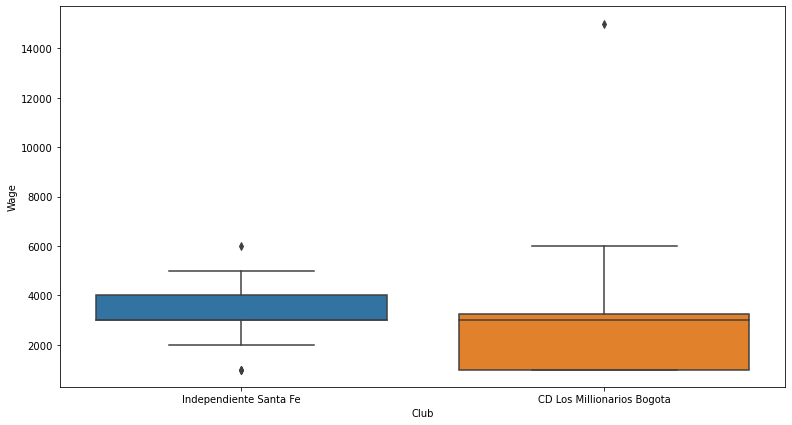

In [ ]:
# Plotting wage by club
plt.figure(figsize = (13, 7))
sns.boxplot(x = 'Club', y = 'Wage', data = fifa_df.loc[fifa_df['Club'].isin(['Independiente Santa Fe', 'CD Los Millionarios Bogota'])])

<AxesSubplot:xlabel='Club', ylabel='Wage'>

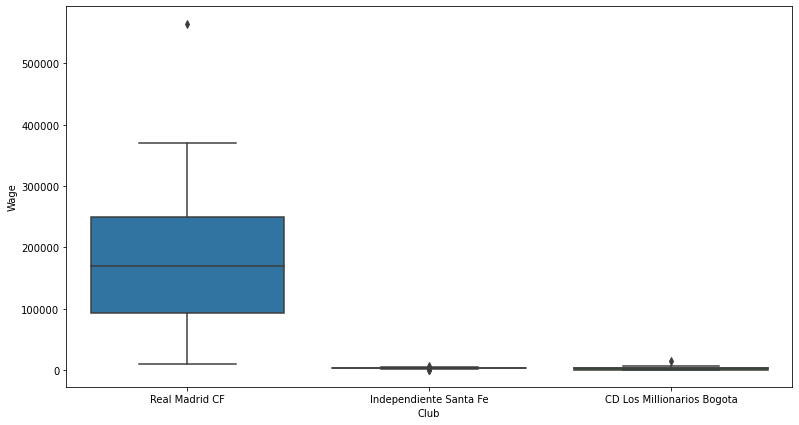

In [ ]:
# Plotting wage by club, including a differential club
plt.figure(figsize = (13, 7))
sns.boxplot(x = 'Club', y = 'Wage', data = fifa_df.loc[fifa_df['Club'].isin(['Independiente Santa Fe', 'CD Los Millionarios Bogota', 'Real Madrid CF'])])

### Profiling the data

In [ ]:
profile = ProfileReport(fifa_df)

In [ ]:
profile.to_notebook_iframe()